Using TensorFlow backend.


Loading data... 
('Length of Data', 50442)
('TEST strat index', 25221)
Creating train data...
Day la training dataset 

Mean of train data :  0.001499107674
Train data shape  :  (25215, 5)
Input training 
[ 0.  0.  0.  0.]
Predict training 
0.0
('X shape:', (25215, 4))
('y shape:', (25215,))


/home/hduser/.local/lib/python2.7/site-packages/sklearn/preprocessing/data.py:321: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/home/hduser/.local/lib/python2.7/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:38: DeprecationWarning: This function is deprecated. Please call randint(0, 20 + 1) instead


Creating test data...
Day la testing dataset 
Mean of test data :  0.0128965736041
Test data shape  :  (25216, 5)
('Shape X_train', (251461, 4))
('Shape X_test', (25216, 4))

Data Loaded. Compiling...

Compilation Time :  0.234652042389
Training...
Train on 238887 samples, validate on 12574 samples
Epoch 1/1
238887/238887 [==============================] - 109s - loss: 5.8290e-04 - val_loss: 2.1308e-04
Predicting...
Reshaping predicted


/home/hduser/.local/lib/python2.7/site-packages/sklearn/preprocessing/data.py:374: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/home/hduser/.local/lib/python2.7/site-packages/sklearn/preprocessing/data.py:374: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/home/hduser/.local/lib/python2.7/site-packages/sklearn/preprocessing/data.py:374: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data h

0.0211038527451 0.0332836706284
earthquake candidate 73
25216 25216
===> 3739


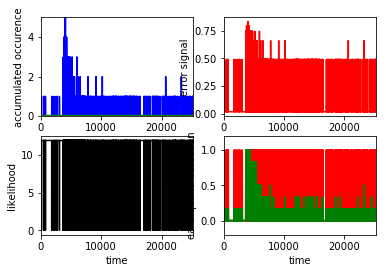

Training duration (s) :  131.503269911
LARMMMMMMMMMMMMM 73


(<keras.models.Sequential at 0x7fd16a56f710>,
 array([ 0.,  0.,  0., ...,  0.,  0.,  0.]),
 array([ 0.00374888,  0.00374888,  0.00374888, ...,  0.00374873,
         0.00374898,  0.00375082], dtype=float32))

In [1]:
""" Inspired by example from
https://github.com/Vict0rSch/deep_learning/tree/master/keras/recurrent
Uses the TensorFlow backend
The basic idea is to detect anomalies in a time-series.
"""
import matplotlib.pyplot as plt
import numpy as np
import time
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.models import Sequential
from numpy import arange, sin, pi, random
import csv
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import norm

np.random.seed(1234)

# Global hyper-parameters
sequence_length = 5
random_data_dup = 20  # each sample randomly duplicated between 0 and 9 times, see dropin function
epochs = 1
batch_size = 512#50
percent=0.5

def dropin(X, y):
    """ The name suggests the inverse of dropout, i.e. adding more samples. See Data Augmentation section at
    http://simaaron.github.io/Estimating-rainfall-from-weather-radar-readings-using-recurrent-neural-networks/
    :param X: Each row is a training sequence
    :param y: Tne target we train and will later predict
    :return: new augmented X, y
    """
    print("X shape:", X.shape)
    print("y shape:", y.shape)
    X_hat = []
    y_hat = []
    for i in range(0, len(X)):
        for j in range(0, np.random.random_integers(0, random_data_dup)):
            X_hat.append(X[i, :])
            y_hat.append(y[i])
    return np.asarray(X_hat), np.asarray(y_hat)


def gen_wave():
    """ Generate a synthetic wave by adding up a few sine waves and some noise
    :return: the final wave
    """
    t = np.arange(0.0, 10.0, 0.01)
    #wave1 = 50+50*sin(2 * pi * t)
    wave1=np.full(1000, 5, dtype=float)
    #wave1 = 10*t+10
    noise = random.normal(0, 0.5, len(t))
    wave1 = wave1 + noise
    print("wave1", len(wave1))
    wave2 = sin(2 * pi * t)
    #wave2 = 10-1*t
    print("wave2", len(wave2))
    t_rider = arange(0.0, 0.5, 0.01)
    wave3=np.full(50, 20, dtype=float)
    print("wave3", len(wave3))
    insert = round(0.8 * len(t))
    wave1[insert:insert + 50] = wave1[insert:insert + 50] + wave3
    # normalize the dataset
    scaler = MinMaxScaler(feature_range=(0, 1))
    wave1 = scaler.fit_transform(wave1)
    return wave1, scaler

def gen_waveEarthquake_Accumulate():
  
    y = []
    date_ticks = []
    csvfile='2.FromJsontoRawstream_earthquake8_ngay21thag9_Accumulate5secondsPredZERO_Ori.csv'
    with open(csvfile,'r') as csvfile:
        plots = csv.reader(csvfile, delimiter=',')
        i=0;
        for row in plots:
	   date_ticks.append(str(row[1]))
           
           y.append(float(row[2]))
	   i=i+1
    noise = random.normal(0, 2, len(y))
    #y=y+noise
    #y=np.convolve(y, np.ones((10,))/10, mode='valid')
    scaler = MinMaxScaler(feature_range=(0, 1))
    y = scaler.fit_transform(y)
    return y,scaler

 #################################Lay tu ben kia
def load_data(filename, seq_len, normalise_window):
    f = open(filename, 'rb').read()
    data = f.decode().split('\n')

    sequence_length = seq_len + 1
    result = []
    for index in range(len(data) - sequence_length):
        result.append(data[index: index + sequence_length])
    
    if normalise_window:
        result = normalise_windows(result)

    result = np.array(result)

    row = round(0.9 * result.shape[0])
    train = result[:int(row), :]
    np.random.shuffle(train)
    x_train = train[:, :-1]
    y_train = train[:, -1]
    x_test = result[int(row):, :-1]
    y_test = result[int(row):, -1]

    x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
    x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))  

    return [x_train, y_train, x_test, y_test]

def normalise_windows(window_data):
    normalised_data = []
    for window in window_data:
        normalised_window = [((float(p) / float(window[0])) - 1) for p in window]
        normalised_data.append(normalised_window)
    return normalised_data
#########################   


def z_norm(result):
    result_mean = result.mean()
    result_std = result.std()
    result -= result_mean
    result /= result_std
    return result, result_mean


def get_split_prep_data(percent):
    
    
    #data, scaler = gen_wave()
    data,scaler= gen_waveEarthquake_Accumulate()
    #a=0
    #b=len(data)
    #data=data[a:b]
    #print data
    print("Length of Data", len(data))
    train_start=0
    train_end=int(len(data)*percent-1)
    test_start=int(len(data)*percent)
    print ('TEST strat index',test_start) 
    test_end=int(len(data))#int(len(data)*0.75)#

    # train data
    print "Creating train data..."

    result = []
    for index in range(train_start, train_end - sequence_length):
        result.append(data[index: index + sequence_length])
    
    result = np.array(result)  # shape (samples, sequence_length)
    print "Day la training dataset \n"#, result
    # normalize the dataset
    #scaler = MinMaxScaler(feature_range=(0, 1))
    #result = scaler.fit_transform(result)
    #result, result_mean = z_norm(result)
   

    print "Mean of train data : ", result.mean()
    print "Train data shape  : ", result.shape

    train = result[train_start:train_end, :]
    np.random.shuffle(train)  # shuffles in-place
    X_train = train[:, :-1]
    y_train = train[:, -1]
    print "Input training \n", X_train[1,:]
    print "Predict training \n", y_train[1]


    X_train, y_train = dropin(X_train, y_train)

    # test data
    print "Creating test data..."

    result = []
    for index in range(test_start, test_end - sequence_length):
        result.append(data[index: index + sequence_length])
    result = np.array(result)  # shape (samples, sequence_length)
    print "Day la testing dataset \n", #result
    # normalize the dataset
    #scaler = MinMaxScaler(feature_range=(0, 1))
    #result = scaler.fit_transform(result)
    #result, result_mean = z_norm(result)

    print "Mean of test data : ", result.mean()
    print "Test data shape  : ", result.shape

    X_test = result[:, :-1]
    y_test = result[:, -1]
    

    print("Shape X_train", np.shape(X_train))
    print("Shape X_test", np.shape(X_test))

    X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
    X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

    return X_train, y_train, X_test, y_test, scaler


def build_model():
    model = Sequential()
    layers = {'input': 1, 'hidden1': 64, 'hidden2': 256, 'hidden3': 100, 'output': 1}

    model.add(LSTM(
            input_length=sequence_length - 1,
            input_dim=layers['input'],
            output_dim=layers['hidden1'],
            return_sequences=True))
    model.add(Dropout(0.2))

    model.add(LSTM(
            layers['hidden2'],
            return_sequences=True))
    model.add(Dropout(0.2))

    model.add(LSTM(
            layers['hidden3'],
            return_sequences=False))
    model.add(Dropout(0.2))

    model.add(Dense(
            output_dim=layers['output']))
    model.add(Activation("linear"))

    start = time.time()
    model.compile(loss="mse", optimizer="rmsprop")
    print "Compilation Time : ", time.time() - start
    return model


def run_network(model=None, data=None):
    global_start_time = time.time()
 
    if data is None:
        print 'Loading data... '
        # train on first 700 samples and test on next 300 samples (has anomaly)
        X_train, y_train, X_test, y_test, scaler = get_split_prep_data(percent)
	#X_train, y_train, X_test, y_test = load_data('FromJsontoRawquan1_korea_Pre_CNNv2__Accumulate60secondsPredZERO_Ori.csv', 50, True)
    else:
        X_train, y_train, X_test, y_test = data

    print '\nData Loaded. Compiling...\n'

    if model is None:
        model = build_model()

    try:
        print("Training...")
        model.fit(
                X_train, y_train,
                batch_size=batch_size, nb_epoch=epochs, validation_split=0.05)
        print("Predicting...")
        predicted = model.predict(X_test)
        print("Reshaping predicted")
        predicted = np.reshape(predicted, (predicted.size,))
    except KeyboardInterrupt:
        print("prediction exception")
        print 'Training duration (s) : ', time.time() - global_start_time
        return model, y_test, 0

    try:
        plt.figure(1)


        plt.subplot(221)
        #plt.title("Actual Earthquake signal")
        plt.plot(scaler.inverse_transform(y_test[:len(y_test)]), 'b')
	plt.xlim([0,len(y_test)])
	plt.ylim([0,max(scaler.inverse_transform(y_test[:len(y_test)]))])
        #plt.subplot(512)
        #plt.title("Predicted Signal")
	plt.ylabel('accumulated occurence')
	plt.xlabel('time')
        plt.plot(scaler.inverse_transform(predicted[:len(y_test)]), 'g',linewidth=2)
	plt.xlim([0,len(y_test)])
	plt.ylim([0,max(scaler.inverse_transform(y_test[:len(y_test)]))])

        plt.subplot(222)
        #plt.title("Error signal")
	plt.ylabel('error signal')
	plt.xlabel('time')
        mse = (abs(scaler.inverse_transform(y_test[:len(y_test)]) - scaler.inverse_transform(predicted[:len(y_test)]))/(scaler.inverse_transform(y_test[:len(y_test)])+1))
        plt.plot(mse, 'r')
	plt.xlim([0,len(y_test)])
	
	
	#plt.figure(2)
	# Fit a normal distribution to the data:
	mse_e=mse[0:200]
        mu, std = norm.fit(mse_e)
	# Plot the histogram.
	#plt.hist(data, bins=25, normed=True, alpha=0.6, color='g')

	# Plot the PDF.
	#xmin, xmax = plt.xlim()
	#x = np.linspace(xmin, xmax, 100)
	plt.subplot(223)
	#plt.title("likelihood")
	plt.ylabel('likelihood')
	plt.xlabel('time')
	#p = norm.pdf(mse, 0.15976, 3*0.12155)
	p = norm.pdf(mse, mu, std)
	#print p
	#plt.plot(p, 'k')
	plt.xlim([0,len(y_test)])
	window_l=1
	p_l=[]
	#p_l=np.pad(p_l, (0, window_l), mode='constant')
	#p_l=np.full(window_l, 0, dtype=float)
	run=0
	for l in range(len(mse) - 1):
		
		if l< window_l:
			p_l.append(0)
		else:
			mu_l,std_l=norm.fit(mse[0:l])
			p_l.append(norm.pdf(mse[l+1], mu_l, std_l))
			if norm.pdf(mse[l+1], mu_l, std_l) <0.01:
				run=l+1
			#else:
				#run=run+1
	plt.plot(p, 'k')
	plt.subplot(224)
	#plt.title("Eartquake detection")
	plt.ylabel('earthquake detection')
	plt.xlabel('time')
	p_c = norm.cdf(mse, mu, std)
	#plt.plot(p_l, 'r')	
	plt.xlim([0,len(y_test)])
	print mu, std
	p_a=[]
	#p.index(0)
	first_alarm=0;
	for y in  range (len(p)):
		if p[y] <0.001:
			#print ('earthquake candidate')
			if first_alarm==0:
				first_alarm=y
				print ('earthquake candidate'), y
			p_a.append(1)
		else:
			p_a.append(0)
			#plt.stem(y,p[y], markerfmt='o', label='a')
			#plt.plot(y,p[y], 'r')	
	#plt.title(title)
	p_d=np.convolve(p_a, np.ones((6,))/6, mode='same')
	plt.plot(p_a, 'r',linewidth=2)	
	plt.plot(p_d, 'g',linewidth=2)
	print len(p_a),len(p_d)
	for i in  range (len(p_d)):
		if p_d[i]>0.8:
			print ('===>'),i+5
			break
			
	plt.xlim([0,len(y_test)])
	plt.ylim([-0.2,1.2])
        plt.show()
	
    except Exception as e:
        print("plotting exception")
        print str(e)
    
    print 'Training duration (s) : ', time.time() - global_start_time
    print 'LARMMMMMMMMMMMMM', first_alarm

    return model, y_test, predicted


run_network()